# Ultimo desafio - predição dos valores de imoveis

## Importando o dataset mesclado, feito em aulas anteriores

In [405]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = pd.read_csv("/home/keven/Documents/Dados/dados_vendas_censo.csv")
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()

## Verificando outliers, para melhor predição do modelo

In [406]:
# SEPARANDO UM DATASET ESPECIFICO PARA TRATAR SOMENTE VALORES RELACIONADOS AOS PREÇOS DOS IMOVEIS

dados_separados = dados_vendas_censo.drop(['Rua',
                                           'Bairro',
                                           'Cidade',
                                           'Metragem',
                                           'Quartos',
                                           'Banheiros',
                                           'Vagas',
                                           'latitude', 
                                           'longitude',
                                           'Situacao_setor'],axis=1)
dados_separados.head(3)

,Valor_anuncio,Valor_mm,Valor_m2,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,7000000.00,7.00,7000.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,3700000.00,3.70,7459.68,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,380000.00,0.38,3040.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88


## HEATMAP PARA PROCURAR COLUNAS NAS RELACIONAIS

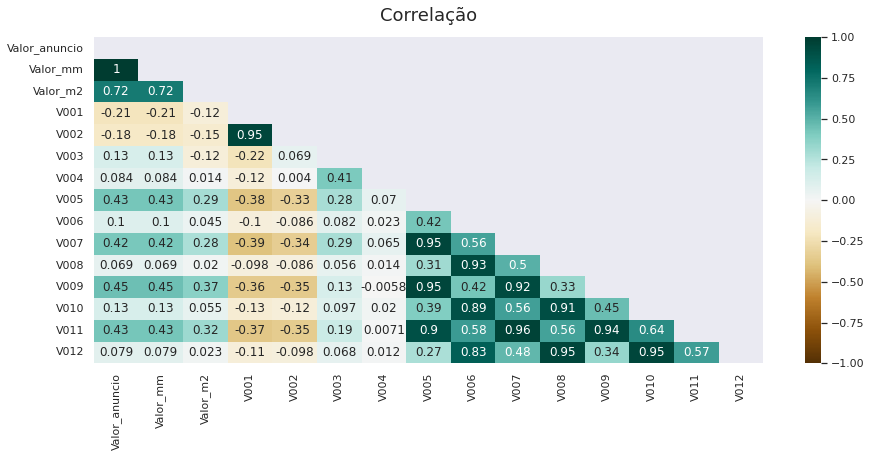

In [407]:
plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(dados_separados.corr(), dtype=bool))
hm = sns.heatmap(dados_separados.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm.set_title('Correlação', fontdict={'fontsize':18}, pad=16)
plt.show()

## DROPANDO COLUNAS NÃO RELACIONAIS

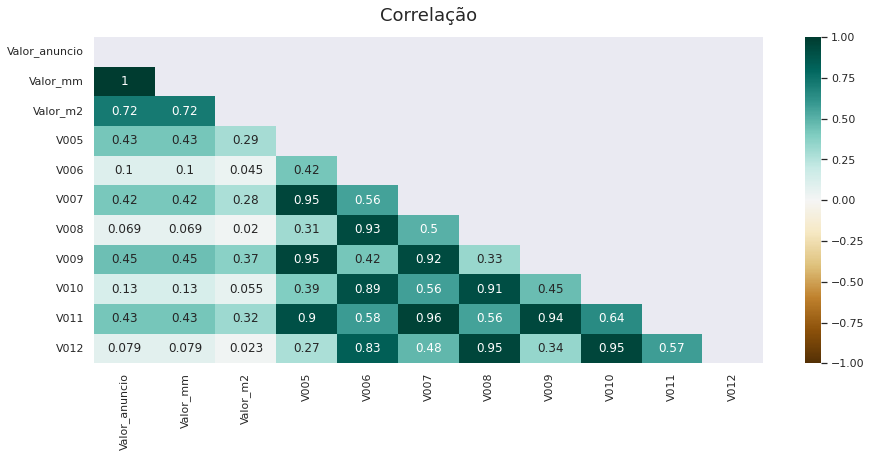

In [408]:
dados_separados = dados_separados.drop(['V001', 'V002', 'V004', 'V003'], axis=1)
plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(dados_separados.corr(), dtype=bool))
hm = sns.heatmap(dados_separados.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm.set_title('Correlação', fontdict={'fontsize':18}, pad=16)
plt.show()

In [409]:
dados_separados.columns

Index(['Valor_anuncio', 'Valor_mm', 'Valor_m2', 'V005', 'V006', 'V007', 'V008',
       'V009', 'V010', 'V011', 'V012'],
      dtype='object')

## O escolhido foi excluir os outliers dos outliers, uma forma de evitar valores discrepantes

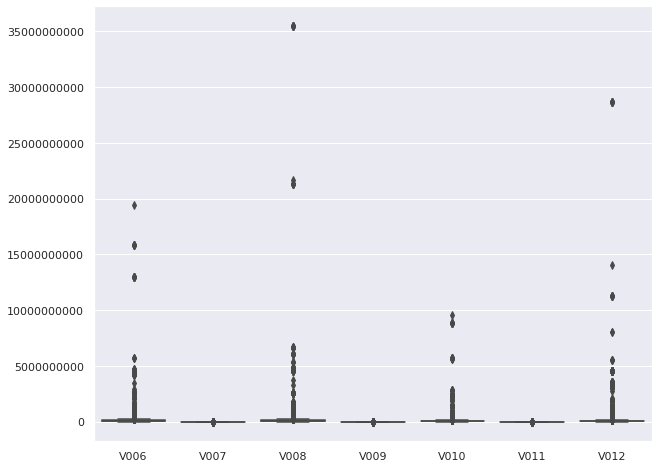

In [410]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_separados[['V006', 'V007', 'V008',
       'V009', 'V010', 'V011', 'V012']])
plt.ticklabel_format(style='plain', axis='Y')
plt.show()

In [411]:
dropar = dados_separados.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")
dropar = dados_separados.query("V006 > 10000000000 & V008 > 10000000000 & V012 > 10000000000")

## Dropando-os

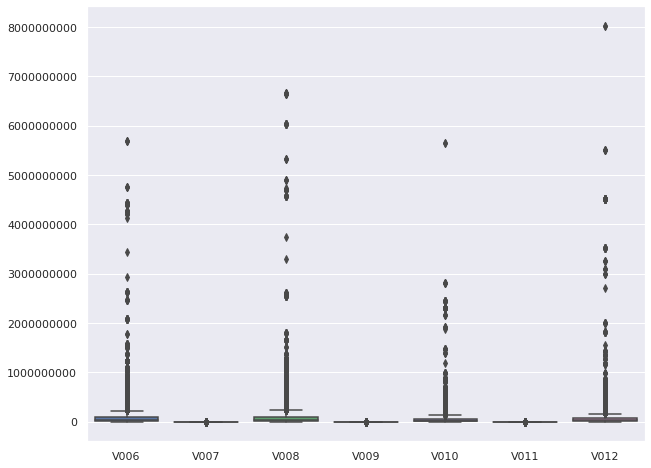

In [412]:
dados_separados.drop(dropar.index, inplace=True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_separados[['V006', 'V007', 'V008',
       'V009', 'V010', 'V011', 'V012']])
plt.ticklabel_format(style='plain', axis='Y')
plt.show()

## RETORNANDO OS DADOS TRATADOS PARA O DATASET ORIGINAL - VAMOS FAZER AS PREDIÇÕES

In [413]:
dados_vendas_censo[['Valor_anuncio', 'Valor_mm', 'Valor_m2', 'V005', 'V006', 'V007', 'V008',
       'V009', 'V010', 'V011', 'V012']] = dados_separados[['Valor_anuncio', 'Valor_mm', 'Valor_m2', 'V005', 'V006', 'V007', 'V008',
       'V009', 'V010', 'V011', 'V012']]
dados_vendas_censo = dados_vendas_censo.drop(['Cidade','longitude', 'latitude', 'Situacao_setor','V001', 'V002', 'V004', 'V003'], axis=1)

In [414]:
dados_vendas_censo.dropna(inplace=True)

In [415]:
dados_vendas_censo.isna()

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,V005,V006,V007,V008,V009,V010,V011,V012
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5600,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5601,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Importando as bibliotecas para ml

In [416]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

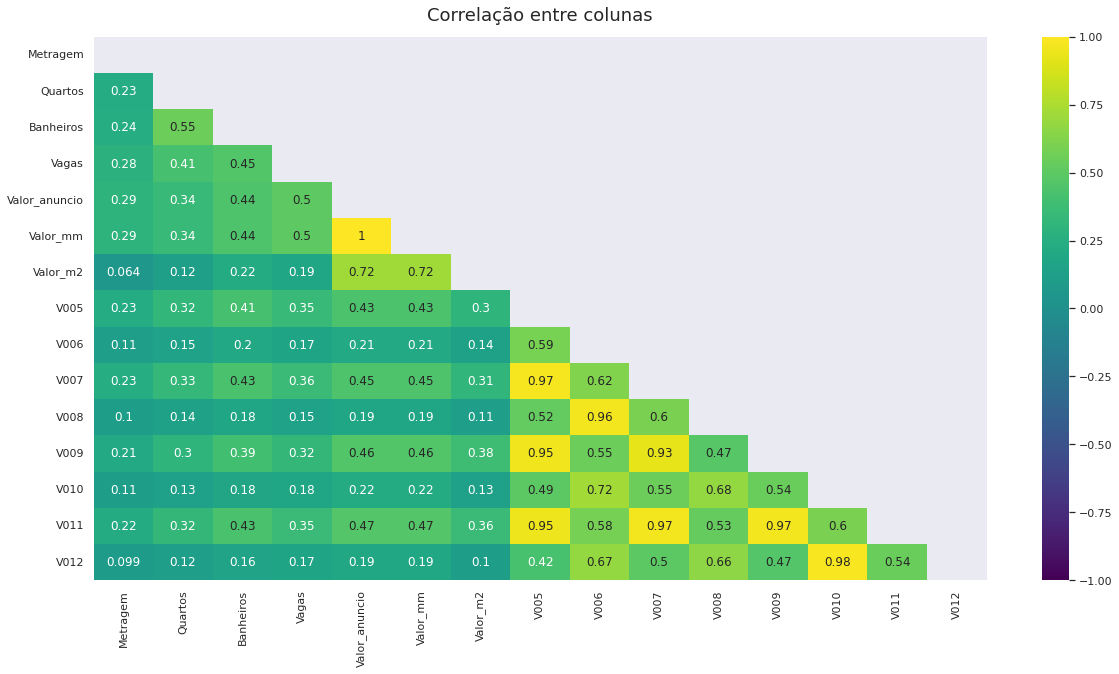

In [417]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
hm = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
hm.set_title('Correlação entre colunas', fontdict={'fontsize':18}, pad=16)
plt.show()

In [418]:
x = dados_vendas_censo[['Metragem']]
y = dados_vendas_censo[['Valor_anuncio']]

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.25, random_state=26)
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [419]:
y_pred = lr.predict(X_test)

In [420]:
print('MAE: ',mean_absolute_error(Y_test, y_pred))
print('MSE: ',mean_squared_error(Y_test, y_pred))
print('MAD: ',median_absolute_error(Y_test, y_pred))
print('R2: ',r2_score(Y_test, y_pred))

MAE:  1554370.1813108155
MSE:  101853969698758.19
MAD:  613314.3651350792
R2:  -5.62995406046723


In [421]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas']]
Y = dados_vendas_censo["Valor_anuncio"]

X_trainx, X_testx, Y_trainx, Y_testx = train_test_split(X, Y, test_size = 0.25, random_state = 26)

lr.fit(X_trainx, Y_trainx)

Y_predx = lr.predict(X_testx)

In [422]:
print('MAE: ',mean_absolute_error(Y_testx, Y_predx))
print('MSE: ',mean_squared_error(Y_testx, Y_predx))
print('MAD: ',median_absolute_error(Y_testx, Y_predx))
print('R2: ',r2_score(Y_testx, Y_predx))

MAE:  1532628.3546239978
MSE:  79705751512038.58
MAD:  660537.8260631561
R2:  -4.188265832375064


In [423]:
Xv = dados_vendas_censo.drop(['Valor_anuncio','Rua', 'Bairro'], axis=1)
Yv = dados_vendas_censo["Valor_anuncio"]

X_trainv, X_testv, Y_trainv, Y_testv = train_test_split(Xv, Yv, test_size = 0.25, random_state = 26)

lr.fit(X_trainv, Y_trainv)

Y_predv = lr.predict(X_testv)

In [425]:
print('MAE: ',mean_absolute_error(Y_testv, Y_predv))
print('MSE: ',mean_squared_error(Y_testv, Y_predv))
print('MAD: ',median_absolute_error(Y_testv, Y_predv))
print('R2: ',r2_score(Y_testv, Y_predv))

MAE:  0.003547855135005352
MSE:  0.00010267238585270417
MAD:  0.0015791673213243484
R2:  1.0


In [426]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_jobs=-1, )